In [1]:
import numpy
import scipy
import csv
from scipy.stats import norm
from scipy import stats
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = open("table.csv")
data_file = csv.reader(data)
    
stock_price = []

for i in data_file:
    stock_price.append(i[4])

stock_price = numpy.array(stock_price)
stock_price = stock_price[1:len(stock_price)]
stock_price = stock_price[0:21]

In [3]:
stock_price_float = numpy.linspace(0,0,len(stock_price))

for i in range(len(stock_price)):
    stock_price_float[i] = float(stock_price[i])

In [4]:
price_analysis = numpy.linspace(0,0,len(stock_price_float)-1)

for i in range(len(price_analysis)):
    price_analysis[i] = numpy.log(stock_price_float[i] / stock_price_float[i+1])
    
average = sum(price_analysis)/len(price_analysis)
stdev = numpy.std(price_analysis)

In [5]:
annual_stdev = numpy.sqrt(252) * stdev

In [6]:
start = date(2015, 11, 8)
exp = date(2018, 1, 19)
time_length = exp - start
time_length_years = time_length.days / 365.25

In [7]:
def d1(sigma, time, share_price, strike_price, r):
    return 1.0 / (sigma * numpy.sqrt(time)) * (numpy.log(float(share_price) / float(strike_price)) + \
                                               time * (r + 1.0 / 2.0 * sigma**2))

def d2(sigma, time, share_price, strike_price, r):
    return d1(sigma, time, share_price, strike_price, r) - sigma * numpy.sqrt(time)

def final(d1_output, d2_output, time, share_price, strike_price, r):
    return norm.cdf(d1_output) * share_price - norm.cdf(d2_output) * strike_price * numpy.exp(-r * time)

In [8]:
sigma = annual_stdev
time = time_length_years
share_price = stock_price_float[0]
strike_price = 20.00
r = .022934

a = d1(sigma, time, share_price, strike_price, r)
b = d2(sigma, time, share_price, strike_price, r)
c = final(a, b, time, share_price, strike_price, r)

print c

4.17901767593


In [9]:
def black_scholes(sigma, time, share_price, strike_price, r):
    a = 1.0 / (sigma * numpy.sqrt(time)) * (numpy.log(float(share_price) / float(strike_price)) + \
                                               time * (r + 1.0 / 2.0 * sigma**2))
    
    b = a - sigma * numpy.sqrt(time)
    
    c = norm.cdf(a) * share_price - norm.cdf(b) * strike_price * numpy.exp(-r * time)
    
    return c

In [10]:
def put(sigma, time, share_price, strike_price, r):
    return black_scholes(sigma, time, share_price, strike_price, r) - share_price + strike_price * numpy.exp(-r * time)

In [11]:
sigma_spread = numpy.linspace(sigma - sigma + .01, sigma + sigma, 50)

time_spread = numpy.linspace(time - time + .01, time + time, 50)

share_price_spread = numpy.linspace(share_price - 10, share_price + 10, 50)

strike_price_spread = numpy.linspace(strike_price - 10, strike_price + 10, 50)

r_spread = numpy.linspace(r - r + .01, r + r, 50)

In [12]:
sigma = annual_stdev
time = time_length_years
share_price = 20.00
strike_price = 20.00
r = .022934

sigma_results_call = numpy.linspace(0,0,50)
sigma_results_put = numpy.linspace(0,0,50)
for i in xrange(50):
    sigma_results_call[i] = black_scholes(sigma_spread[i], time, share_price, strike_price, r)
    sigma_results_put[i] = put(sigma_spread[i], time, share_price, strike_price, r)

time_results_call = numpy.linspace(0,0,50)
time_results_put = numpy.linspace(0,0,50)
for i in xrange(50):
    time_results_call[i] = black_scholes(sigma, time_spread[i], share_price, strike_price, r)
    time_results_put[i] = put(sigma, time_spread[i], share_price, strike_price, r)
    
share_price_results_call = numpy.linspace(0,0,50)
share_price_results_put = numpy.linspace(0,0,50)
for i in xrange(50):
    share_price_results_call[i] = black_scholes(sigma, time, share_price_spread[i], strike_price, r)
    share_price_results_put[i] = put(sigma, time, share_price_spread[i], strike_price, r)
    
strike_price_results_call = numpy.linspace(0,0,50)
strike_price_results_put = numpy.linspace(0,0,50)
for i in xrange(50):
    strike_price_results_call[i] = black_scholes(sigma, time, share_price, strike_price_spread[i], r)
    strike_price_results_put[i] = put(sigma, time, share_price, strike_price_spread[i], r)
    
r_results_call = numpy.linspace(0,0,50)
r_results_put = numpy.linspace(0,0,50)
for i in xrange(50):
    r_results_call[i] = black_scholes(sigma, time, share_price, strike_price, r_spread[i])
    r_results_put[i] = put(sigma, time, share_price, strike_price, r_spread[i])    

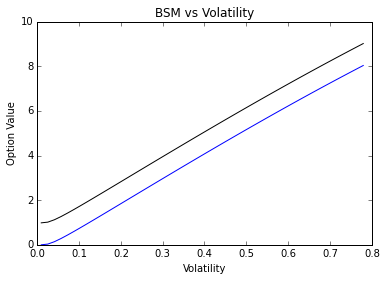

In [13]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(sigma_spread, sigma_results_call, 'k')
axes.plot(sigma_spread, sigma_results_put, 'b')
axes.set_xlabel("Volatility")
axes.set_ylabel("Option Value")
axes.set_title("BSM vs Volatility")

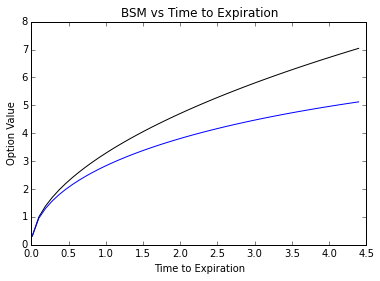

In [14]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(time_spread, time_results_call, 'k')
axes.plot(time_spread, time_results_put, 'b')
axes.set_xlabel("Time to Expiration")
axes.set_ylabel("Option Value")
axes.set_title("BSM vs Time to Expiration")

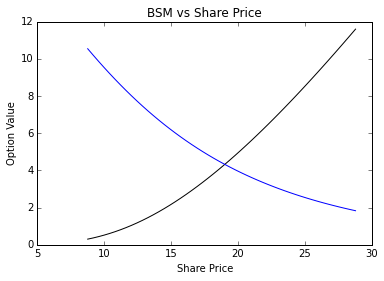

In [15]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(share_price_spread, share_price_results_call, 'k')
axes.plot(share_price_spread, share_price_results_put, 'b')
axes.set_xlabel("Share Price")
axes.set_ylabel("Option Value")
axes.set_title("BSM vs Share Price")

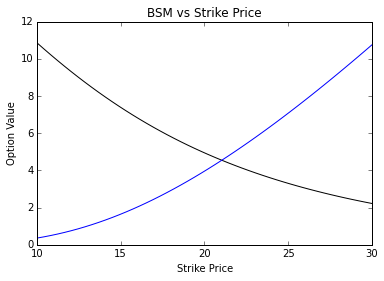

In [16]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(strike_price_spread, strike_price_results_call, 'k')
axes.plot(strike_price_spread, strike_price_results_put, 'b')
axes.set_xlabel("Strike Price")
axes.set_ylabel("Option Value")
axes.set_title("BSM vs Strike Price")

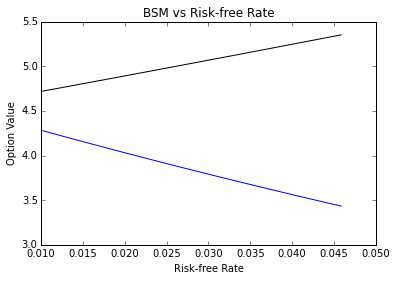

In [17]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(r_spread, r_results_call, 'k')
axes.plot(r_spread, r_results_put, 'b')
axes.set_xlabel("Risk-free Rate")
axes.set_ylabel("Option Value")
axes.set_title("BSM vs Risk-free Rate")

In [18]:
#Solve for Implied Volatility
def difference1(sigma_value, time, share_price, strike_price, r, ACTUAL_VALUE):
    
    a = 1.0 / (sigma_value * numpy.sqrt(time)) * (numpy.log(float(share_price) / float(strike_price)) + \
                                               time * (r + 1.0 / 2.0 * sigma_value**2))
    
    b = a - sigma_value * numpy.sqrt(time)
    
    c = norm.cdf(a) * share_price - norm.cdf(b) * strike_price * numpy.exp(-r * time)
    
    delta = c - ACTUAL_VALUE
    
    return delta

In [19]:
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934
strike_price = 160.00
ACTUAL_VALUE = 0.55

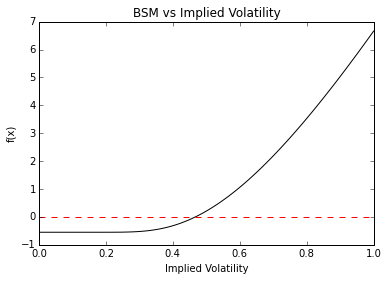

In [20]:
sigma_test = numpy.linspace(0.0001, 0.9999, 100)
results_test = numpy.linspace(0,0,100)
for i in xrange(len(results_test)):
   results_test[i] = difference1(sigma_test[i],time, share_price, strike_price, r, ACTUAL_VALUE)


fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(sigma_test, results_test, 'k')
axes.plot(sigma_test, numpy.zeros(len(sigma_test)), 'r--')
axes.set_xlabel("Implied Volatility")
axes.set_ylabel("f(x)")
axes.set_title("BSM vs Implied Volatility")


In [21]:
def secant_approach(tolerance, time, share_price, strike_price, r, ACTUAL_VALUE):
    
    s = 0.53
    s_l = 0.52
    
    MAX = 1000
    
    for steps in range(MAX):
        if numpy.abs(difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE)) < tolerance:
            break
        
        else:
            s_n = s - difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE) * (s - s_l) / \
                         (difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE) - difference1(s_l, time, share_price, strike_price, r, ACTUAL_VALUE))
            s_l = s
            s = s_n
            
    return s

In [22]:
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934
strike_price = 160.00
ACTUAL_VALUE = 0.55

secant_approach(.0001, time, share_price, strike_price, r, ACTUAL_VALUE)

0.46747505787740334

In [23]:
def bisection_approach(tolerance, time, share_price, strike_price, r, ACTUAL_VALUE):
    guess_left = 0.00001
    guess_right = 0.999
    
    f_guessleft = difference1(guess_left, time, share_price, strike_price, r, ACTUAL_VALUE)
    f_guessright = difference1(guess_right, time, share_price, strike_price, r, ACTUAL_VALUE)
    
    delta_guess = guess_right - guess_left
    
    MAX = 1000
    truth = 0
    
    for step in xrange(1,MAX+1):
        new_guess = guess_left + delta_guess / 2.0
        f_newguess = difference1(new_guess, time, share_price, strike_price, r, ACTUAL_VALUE)
        
        if numpy.sign(f_guessleft) != numpy.sign(f_newguess):
            guess_right = new_guess
            f_guessright = f_newguess
        
        else:
            guess_left = new_guess
            f_guessleft = f_newguess
            
        delta_guess = guess_right - guess_left
        
        if numpy.abs(difference1(new_guess, time, share_price, strike_price, r, ACTUAL_VALUE)) < tolerance:
            truth = 1
            break
            
    if truth == 1:    
        answer = new_guess
        
    else:
        answer = "did not work"
            
    return answer

In [24]:
#Bisection tester
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934
strike_price = 80.00
ACTUAL_VALUE = 34.95

bisection_approach(.0001, time, share_price, strike_price, r, ACTUAL_VALUE)

0.5316380401611329

In [25]:
def bisection_modified(bracket_tolerance, time, share_price, strike_price, r, ACTUAL_VALUE,N):
    guess_left = 0.00001
    guess_right = 0.999
    
    f_guessleft = difference1(guess_left, time, share_price, strike_price, r, ACTUAL_VALUE)
    f_guessright = difference1(guess_right, time, share_price, strike_price, r, ACTUAL_VALUE)
    
    delta_guess = guess_right - guess_left
    
    MAX = 1000
    truth = 0
    
    if N == 0:
        fig = plt.figure()
        axes = fig.add_subplot(1,1,1)
        graph_range = numpy.linspace(0.001,0.999,50)
        result_array = numpy.linspace(0,0,len(graph_range))
        for i in range(len(result_array)):
            result_array[i] = difference1(graph_range[i], time, share_price, strike_price, r, ACTUAL_VALUE)
        axes.plot(graph_range, result_array, 'r--')
    
    for step in xrange(1,MAX+1):
        new_guess = guess_left + delta_guess / 2.0
        f_newguess = difference1(new_guess, time, share_price, strike_price, r, ACTUAL_VALUE)
        
        if N == 0:
            axes.plot(new_guess, f_newguess, 'ko')
            axes.text(new_guess, f_newguess +.05, str(step))
        
        if numpy.sign(f_guessleft) != numpy.sign(f_newguess):
            guess_right = new_guess
            f_guessright = f_newguess
        
        else:
            guess_left = new_guess
            f_guessleft = f_newguess
            
        delta_guess = guess_right - guess_left
        
        if numpy.abs(delta_guess) < bracket_tolerance:
            truth = 1
            break
            
    if truth == 1:    
        answer_1 = guess_left
        answer_2 = guess_right
        
    else:
        answer = "did not work"
            
    return answer_1, answer_2

(0.5307234375000001, 0.5316990136718751)

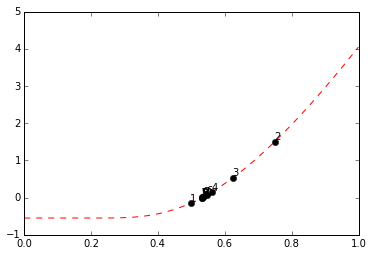

In [26]:
#Bisection modified tester
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934
strike_price = 80.00
ACTUAL_VALUE = 34.95

bisection_modified(.001, time, share_price, strike_price, r, ACTUAL_VALUE,0)

In [27]:
def secant_modified(tolerance, time, share_price, strike_price, r, ACTUAL_VALUE, bracket):
    
    s = bracket[0]
    s_l = bracket[1]
    
    MAX = 1000
    
    for steps in range(MAX):
        if numpy.abs(difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE)) < tolerance:
            break
        
        else:
            s_n = s - difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE) * (s - s_l) / \
                         (difference1(s, time, share_price, strike_price, r, ACTUAL_VALUE) - difference1(s_l, time, share_price, strike_price, r, ACTUAL_VALUE))
            s_l = s
            s = s_n
            
    return s

In [28]:
#Secant modified tester
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934
strike_price = 80.00
ACTUAL_VALUE = 34.95

bracket_result = bisection_modified(.01, time, share_price, strike_price, r, ACTUAL_VALUE,1)

secant_modified(.0001, time, share_price, strike_price, r, ACTUAL_VALUE, bracket_result)

0.53162285125864928

In [29]:
def implied_vol(bracket_tolerance, time, share_price, strike_price, r, ACTUAL_VALUE):
    bracket_result = bisection_modified(bracket_tolerance, time, share_price, strike_price, r, ACTUAL_VALUE,1)
    return secant_modified(.0001, time, share_price, strike_price, r, ACTUAL_VALUE, bracket_result)

In [30]:
#Testing the hybrid
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934

strike_prices = numpy.array([80.00,95.00,100.00,114.29,127.14,145.71,160.00])
ACTUAL_VALUES = numpy.array([34.95,21.50,17.90,8.89,4.16,1.17,0.55])

values = numpy.linspace(0,0,len(strike_prices))

for i in range(len(strike_prices)):
    strike_price = strike_prices[i]
    ACTUAL_VALUE = ACTUAL_VALUES[i]
    values[i] = implied_vol(.001, time, share_price, strike_price, r, ACTUAL_VALUE)
    print values[i]

0.531636916844
0.471088332295
0.481871759767
0.447415405998
0.439721956931
0.4382237838
0.467474606993


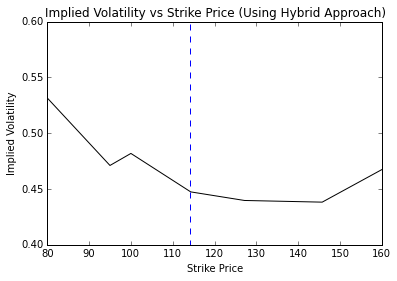

In [31]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.plot(strike_prices, values, 'k')
axes.plot(numpy.ones(20)*share_price, numpy.linspace(0,0.7,20),'b--')
axes.set_xlabel("Strike Price")
axes.set_ylabel("Implied Volatility")
axes.set_ylim((0.4, 0.6))
axes.set_title("Implied Volatility vs Strike Price (Using Hybrid Approach)")

In [32]:
def difference(sigma_value):
    
    a = 1.0 / (sigma_value * numpy.sqrt(time)) * (numpy.log(float(share_price) / float(strike_price)) + \
                                               time * (r + 1.0 / 2.0 * sigma_value**2))
    
    b = a - sigma_value * numpy.sqrt(time)
    
    c = norm.cdf(a) * share_price - norm.cdf(b) * strike_price * numpy.exp(-r * time)
    
    delta = c - ACTUAL_VALUE
    
    return delta

In [33]:
start = date(2015, 11, 8)
exp = date(2016, 1, 15)
time_length = exp - start
time_length_years = time_length.days / 365.25

time = time_length_years
share_price = 114.06
r = .022934

In [34]:
strike_prices = numpy.array([80.00,95.00,100.00,114.29,127.14,145.71,160.00])
ACTUAL_VALUES = numpy.array([34.95,21.50,17.90,8.89,4.16,1.17,0.55])

In [35]:
values = numpy.linspace(0,0,len(strike_prices))

for i in range(len(strike_prices)):
    strike_price = strike_prices[i]
    ACTUAL_VALUE = ACTUAL_VALUES[i]
    values[i] = scipy.optimize.fsolve(difference,.3)
    print values[i]

0.531637046825
0.47108842684
0.4818717882
0.447415403668
0.439722020914
0.438224046862
0.467474995535


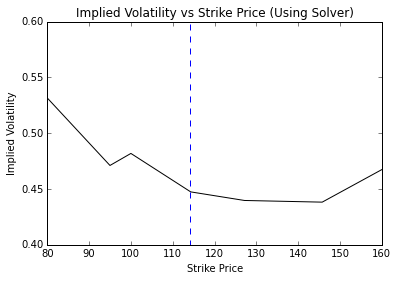

In [36]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.plot(strike_prices, values, 'k')
axes.plot(numpy.ones(20)*share_price, numpy.linspace(0,0.7,20),'b--')
axes.set_xlabel("Strike Price")
axes.set_ylabel("Implied Volatility")
axes.set_ylim((0.4, 0.6))
axes.set_title("Implied Volatility vs Strike Price (Using Solver)")